<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - V1 - Simple
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

|       |                       |
|-------|-----------------------|
| Jalon | Date limite 07/08/2022|
| Critères de performance | À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.|
|Livrables|Une présentation type "Powerpoint", faisant office de veille et Jupyter Notebooks : classification|

### Livrables

Une présentation type "Powerpoint", faisant office de veille.

Quelques questions de veille 
- C'est quoi le Deep Learning 
- Présenter la librairie Tensorflow ...
- Qu'est-ce qu'un CNN (l'avantage, l'inconvénient, domaine d'application), est-ce qu'il y a d'algorithmes plus puissants que CNN 
- Décrire notamment comment construire un CNN et l'utilité de chaque étape 
(sinon vous pouvez représenter d'autres axes qui vous sembler intéressant à savoir avant de commencer un projet sur le Deep Learning)


Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/
- https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [37]:
import matplotlib.pyplot as plt

from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from os import getcwd

import cv2

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set


<div style="display: flex; background-color: blue;" >

# 2.Modèle simple
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Chargement des données
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.1.1. Nettoyage des données
</div>

```
Deleted 1578 images.
Deleted 0 images.
```
Images supprimées du dataset au premier tour (aux prochaines exécutions, les chiffres devraient être à 0, donc pour mémoire)

In [5]:
# Il faut supprimer les images qui ne sont pas compatibles
removed_files = del_corrupt_img(training_data_path, include_sub_dir=1, verbose=verbose)
removed_files.extend(del_corrupt_img(validation_data_path, include_sub_dir=1, verbose=verbose))

Deleted 1578 images.
Deleted 0 images.


<div style="display: flex; background-color: indigo;" >

#### 2.1.2. Chargement et standardisation des données
</div>

Dans le dataset les dimensions les plus petites sont :
- dog : 58 x 50 
- cat : 4x4, puis 50x50

On ne prend pas en compte l'image en 4x4, la taille la plus petite est donc 50x50.

In [8]:
# target_size=(64,64) # la taille de la plus petite image
target_size=(50,50) # la taille de la plus petite image
batch_size = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

In [9]:
train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set=train_datgen.flow_from_directory(training_data_path,     target_size=target_size,batch_size=batch_size,class_mode=class_mode)
validation_set=train_datgen.flow_from_directory(validation_data_path, target_size=target_size,batch_size=batch_size,class_mode=class_mode)

Found 25570 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


<div style="display: flex; background-color: indigo;" >

#### 2.1.3. Identification des labels
</div>

In [10]:
print(training_set.class_indices)
labels = list(training_set.class_indices.keys())
labels

{'cat': 0, 'dog': 1}


['cat', 'dog']

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Création du réseau de neurones
</div>

In [11]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[target_size[0],target_size[1],3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

<div style="display: flex; background-color: indigo;" >

#### 2.2.1 Visualisation du réseau de neurones
</div>

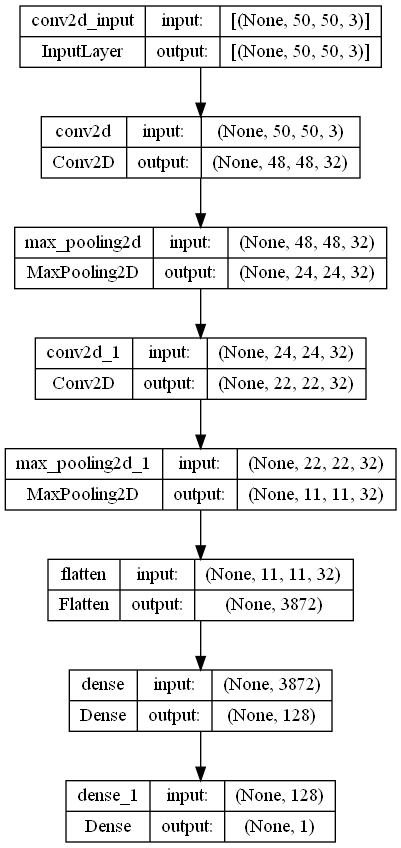

In [12]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Compilation et entrainement
</div>

In [13]:
opt = Adam(learning_rate=0.000001)
cnn.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

Résultats avec : 

| Epoch | Train cat          | Train dog         | Res |
|-------|--------------------|-------------------|-----|
| 50/50 | 1 029              | 1 119             |`68/68 [==============================] - 11s 168ms/step - loss: 0.6710 - accuracy: 0.5945 - val_loss: 0.6762 - val_accuracy: 0.5780`|
| 50/50 | 1 029 + 12 500     | 1 119 + 12 500    |`800/800 [==============================] - 70s 88ms/step - loss: 0.6185 - accuracy: 0.6745 - val_loss: 0.6189 - val_accuracy: 0.6740`|

Ajout de 12 500 images par catégorie (source : PetImages), après suppression des images corrompues :

```
Training : Found 25570 images belonging to 2 classes.
Validation : Found 2000 images belonging to 2 classes.
```

In [15]:
epochs = 50
history_cnn = cnn.fit(training_set, epochs = epochs , validation_data=validation_set)

Epoch 1/50
800/800 [==============================] - 73s 91ms/step - loss: 0.6923 - accuracy: 0.5171 - val_loss: 0.6918 - val_accuracy: 0.5130
Epoch 2/50
800/800 [==============================] - 65s 81ms/step - loss: 0.6903 - accuracy: 0.5327 - val_loss: 0.6897 - val_accuracy: 0.5300
Epoch 3/50
800/800 [==============================] - 62s 78ms/step - loss: 0.6885 - accuracy: 0.5628 - val_loss: 0.6879 - val_accuracy: 0.5630
Epoch 4/50
800/800 [==============================] - 62s 77ms/step - loss: 0.6867 - accuracy: 0.5764 - val_loss: 0.6865 - val_accuracy: 0.5850
Epoch 5/50
800/800 [==============================] - 71s 89ms/step - loss: 0.6847 - accuracy: 0.5891 - val_loss: 0.6838 - val_accuracy: 0.5960
Epoch 6/50
800/800 [==============================] - 70s 87ms/step - loss: 0.6830 - accuracy: 0.6021 - val_loss: 0.6825 - val_accuracy: 0.6060
Epoch 7/50
800/800 [==============================] - 72s 89ms/step - loss: 0.6815 - accuracy: 0.6138 - val_loss: 0.6806 - val_accuracy:

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Evaluation de l'entrainement
</div>

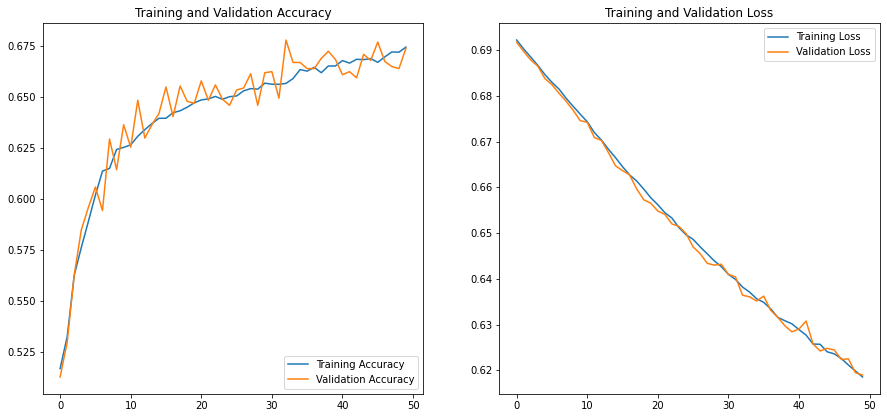

In [16]:
show_learning_graph(history=history_cnn, epochs=epochs, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Prédiction
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.4.1. 1 image
</div>

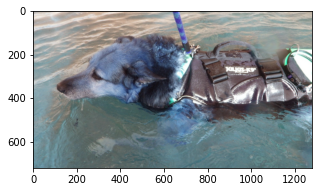

In [17]:
img_test = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg'

plt.figure(figsize=(5, 5))
imread = cv2.imread(img_test)
plt.imshow(imread)
plt.show()

In [18]:
found, predict_class = predict_img(model=cnn,img_test=img_test, target_size=target_size, labels=labels,label_expected="dog",verbose=verbose)
found, predict_class

1/1 [==============================] - 3s 3s/step


(1, 1)

<div style="display: flex; background-color: indigo;" >

#### 2.4.2. Quelques images
</div>

1/1 [==============================] - 0s 18ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 22ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 20ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 18ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 17ms/step
cat expected (predict_class : 1), dog predict


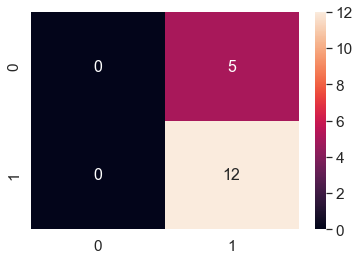

In [19]:
aurelie_test, aurelie_y = get_aurelie_test()
df_cm, fail_files = predict_n_img(cnn, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 2.4.3. N images
</div>

1/1 [==============================] - 0s 23ms/step
cat expected (predict_class : 1), dog predict
1 C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (1).jpg cannot identify image file <_io.BytesIO object at 0x0000015E80524630>
1/1 [==============================] - 0s 18ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 24ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 19ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 22ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 29ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 28ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================] - 0s 21ms/step
cat expected (predict_class : 1), dog predict
1/1 [==============================

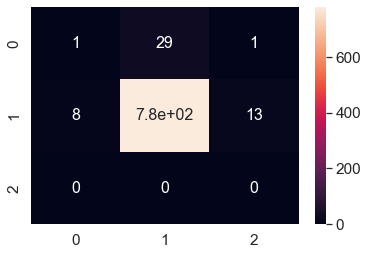

In [20]:
aurelie_test, aurelie_y = get_aurelie_full_test(label_codes=training_set.class_indices)
df_cm, fail_files = predict_n_img(cnn, aurelie_test, aurelie_y,target_size, labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Conclusion
</div>

Malgré l'ajout de données, ce modèle ne prédit que des chiens... Il faut donc revoir le modèle.

<div style="display: flex; background-color: blue;" >

# 3.Modèle pré-entrainés
</div>

https://keras.io/api/applications/#usage-examples-for-image-classification-models

Résultats des tests : (cf. notebook excluded model)

|Model   | Commentaires                                                                                                       |
|--------|--------------------------------------------------------------------------------------------------------------------|
|ResNet50| Toutes les images testées ont été classifiées en : `Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`, même les images de chat|
| VGG16  | Permet d'extraire des features|
| VGG19  | Permet d'extraire des features|
| InceptionV3 | Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`|


<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. ResNet50
</div> 

<div style="display: flex; background-color: indigo;" >

#### 3.2.1. Utilisation directe
</div>

Toutes les images testées ont été classifiées en : `Predicted: [('n02102318', 'cocker_spaniel', 0.07705149), ('n02106550', 'Rottweiler', 0.07325226), ('n02102480', 'Sussex_spaniel', 0.07100144)]`, même les images de chat.
Ce modèle n'est donc pas adapté tel quel.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. VGG*
</div>

VGG16 et VGG19 permettent d'extraire des features, qui doivent certainement être utilisées par ailleurs. ?

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.4. InceptionV3
</div>

1. Récupération du modèle
1. Customisation du modèle
1. Compilation et apprentissage sur les données du projet
1. Résultat avec 50 Epoch : `800/800 [==============================] - 60s 75ms/step - loss: nan - accuracy: 0.4997 - val_loss: nan - val_accuracy: 0.5000`

Ce modèle ne semble pas adapté à notre besoin, de plus il est beaucoup trop complexe.

<div style="display: flex; background-color: blue;" >

# 4.Nouvelle version du Modèle
</div>